In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [3]:
# loading the dataset using tf from the directory

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

# we r using shuffling,so each batch contain diff-diff image that belongs to diff-diff label

Found 888 files belonging to 4 classes.


In [4]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 120 files belonging to 4 classes.


In [5]:
print(len(dataset2))

4


In [6]:
class_names = dataset.class_names
class_names

['Field Cricket', 'Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']

In [7]:
print(len(dataset))             # batch size
#print(int(880/32)+1)

28


In [8]:
dataset.take(1)      #1st batch

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
for image_batch,label_batch in dataset.take(1):       # taking 1st batch
    print(image_batch.shape)   #image shape of that batch
    print(label_batch)  # kis label ka hai image 
    #print(label_batch.name)

(32, 256, 256, 3)
tf.Tensor([3 3 2 0 1 0 2 2 1 0 2 0 2 2 2 0 1 3 1 1 3 1 2 3 0 1 3 1 3 3 0 2], shape=(32,), dtype=int32)


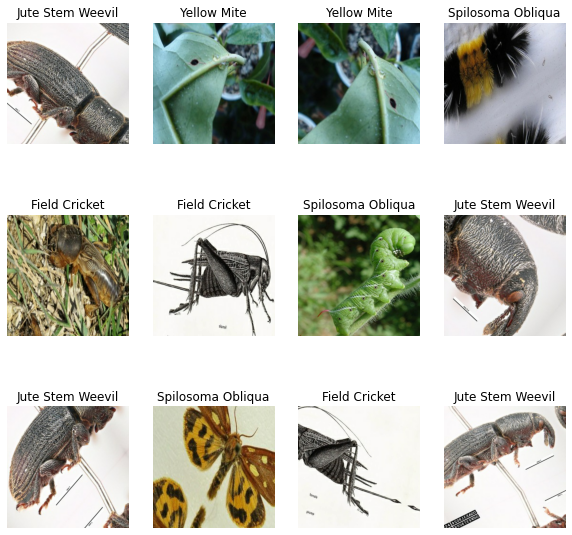

In [10]:
plt.figure(figsize=(10,10))
for image_bathc,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_bathc[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)
#28*32

28

In [12]:
# Steps---
# 1 - split into train and validation
# 2 - resize and rescale
# 3 - Data Augmentation
# 4 - Fit the model
# 5 - Check accuracy with test dataset

# Split into train and validation

In [13]:
train_size = 0.9
len(dataset)*train_size

25.2

In [14]:
train_ds=dataset.take(25)  # it will take first 25 batch of a batch of dataset and store in train_ds(NOW THis is our train ds)
len(train_ds)

25

In [15]:
def get_dataset_partition_tf(ds,train_split=0.9, val_split=0.1, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds,val_ds

In [16]:
train_ds,val_ds = get_dataset_partition_tf(dataset)

In [17]:
len(train_ds)           # total number of batch for training size 

25

In [18]:
len(val_ds)            #total number of batch for validation

3

In [19]:
def get_dataset_partitionn_tf(ds,val_split=0.5,test_split=0.5, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    val_size = int(val_split*ds_size)
    
    val_ds = ds.take(val_size)
    test_ds = ds.skip(val_size)
    
    return val_ds,test_ds



In [20]:
val_ds,test_ds = get_dataset_partitionn_tf(dataset2,val_split = 0.5,test_split=0.5)

In [21]:
len(val_ds)

2

In [22]:
len(test_ds)

2

# Till here train,test,val split wala part done
## Total batches for training  - 28 (aug) 
### Traing Batch       - 2    
### Validation Batch   -2 

In [23]:
# Augmentation 

import Augmentor


""""import Augmentor

path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/"
p = Augmentor.Pipeline(path_to_data)
p.rotate(probability=0.85, max_left_rotation=10, max_right_rotation=10)    #rotation
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)                  #zoom
p.sample(2)  #how many images u want to augment

# probability parameter controls how often the operation is applied""""

In [24]:
total_class_in_dataset = list(dataset.class_names)
print(total_class_in_dataset)

['Field Cricket', 'Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']


In [25]:
import Augmentor

path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/"

for m in range(len(total_class_in_dataset)):
    path_of_foldd = path_to_data+total_class_in_dataset[m]+'/'

    p = Augmentor.Pipeline(path_of_foldd)
    p.rotate(probability=0.9, max_left_rotation=10, max_right_rotation=10)    #rotation
    p.zoom(probability=0.4, min_factor=1.1, max_factor=1.6)                  #zoom
    p.sample(1)  #how many images u want to augment

    # probability parameter controls how often the operation is applied
    

Initialised with 222 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Field Cricket/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1C5BEB76B50>: 100%|██| 1/1 [00:00<00:00, 199.99 Samples/s]


Initialised with 222 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1C5BEEA84F0>: 100%|███| 1/1 [00:00<00:00, 71.43 Samples/s]


Initialised with 222 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Spilosoma Obliqua/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1C5BEBAE2E0>: 100%|███| 1/1 [00:00<00:00, 83.32 Samples/s]

Initialised with 222 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Yellow Mite/output.


Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1C5BEB35F70>: 100%|██| 1/1 [00:00<00:00, 100.03 Samples/s]


In [26]:

from pathlib import Path
import shutil
import os

path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/"


for XD in range(len(total_class_in_dataset)):
    path_of_new_img = path_to_data+total_class_in_dataset[XD]+'/'+'output'+'/'
    path_of_fold = path_to_data+total_class_in_dataset[XD]+'/'
    #print(path_of_fold)
    #print(path_of_new_img,'\n')
    files=os.listdir(path_of_new_img)

    # iterating over all the files in
    # the source directory
    for file_name in files:
       shutil.copy(path_of_new_img+file_name, path_of_fold+file_name)
    print("Files are copied successfully")
    
    

Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully


In [27]:
path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/"

for lol in range(len(total_class_in_dataset)):
    folder_path = path_to_data+total_class_in_dataset[lol]+'/'+'output'+'/'                
    shutil.rmtree(folder_path)                                           # removing the new dir that is created during data augmentation
    
    #shutil.rmtree("C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/output/")
print("Successfully removed created folder")

Successfully removed created folder


# Steps left ----
# fit the model
# accuracy